In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2 as cv

## Explaination

Taking the input of the image and plotting it

(-0.5, 654.5, 1023.5, -0.5)

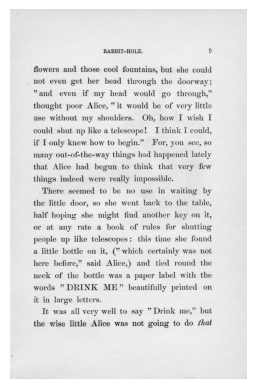

In [ ]:
img = cv.imread('/content/bookpage_1.jpeg', cv.IMREAD_GRAYSCALE)
# img = ImageOps.grayscale(img)
pixels = np.array(img)
# np.min(pixels), np.max(pixels)
plt.imshow(img, cmap='gray')
plt.axis('off')

Defining a function count_vals, which will return the values and their counts. This will help in plotting the histograms and getting the values of probability.

In [ ]:
def count_vals(arr):
    """
    arr: ndarray
    returns values and counts of that values.
    """
    t_values, t_counts = np.unique(arr, return_counts=True)
    values = np.array([k for k in range(0, 256)])
    counts = np.array([0]*256)
    for i in t_values:
        counts[i] = t_counts[np.where(t_values == i)[0]]
    return values, counts

In [ ]:
values, counts = count_vals(pixels)

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


<BarContainer object of 256 artists>

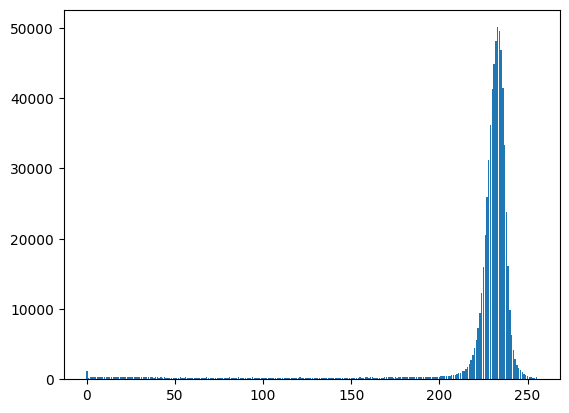

In [ ]:
plt.bar(values, counts)

Lets take t = 1 and do the procedure, after that we will do the same for the subsequent values.

In [ ]:
t = 1

Taking the probability of each values by dividing the counts array by sum(counts) and then taking its cdf.

In [ ]:
px = counts/sum(counts)

In [ ]:
cdf = np.cumsum(px)

Here w1 and w2 denotes the summation of probabilites. w1 denotes from 0 to t, and w2 denotes from t to 255.

In [ ]:
w1 = cdf[t]
w2 = 1 - cdf[t]

In [ ]:
ipx = np.array([i*px[i] for i in range(0, 256)])

for finding the expression below we need to calculate i*P(i) first, and then we have find out the value of μ1 and μ2

In [ ]:
mu1 = sum(ipx[:t+1])/w1
mu2 = sum(ipx[t+1:])/w2

sigma1 and sigma2 are the variences, calculated by the the given formula

In [ ]:
sigma1 = sum([((i - mu1)**2)*px[i] for i in range(0, t+1)])/w1
sigma2 = sum([((i - mu2)**2)*px[i] for i in range(t+1, 256)])/w2

Here we need to minimise the expression below. For the otsu's thresholding we need to find the optimum value of t for which varience is at its minimum

In [ ]:
varience = w1*sigma1 + w2*sigma2

lets check for all the values of t from 1 to 256 and find the minimum value among them.

In [ ]:
pairs = []
for t in range(1, 256):
    w1 = cdf[t]
    w2 = 1 - cdf[t]
    ipx = np.array([i*px[i] for i in range(0, 256)])
    mu1 = sum(ipx[:t+1])/w1
    mu2 = sum(ipx[t+1:])/w2
    sigma1 = sum([((i - mu1)**2)*px[i] for i in range(0, t+1)])/w1
    sigma2 = sum([((i - mu2)**2)*px[i] for i in range(t+1, 256)])/w2
    varience = w1*sigma1 + w2*sigma2
    pairs.append(varience)

In [ ]:
min(pairs)

216.19129925201815

Threshold will be equal to the index of the minimum value, but we need to add one because we started counting from t=1 and arrays are zero indexed

In [ ]:
threshold = pairs.index(min(pairs))+1

by over the complete image, and checking each pixels we change its value either to the maximum or to the minimum.

In [ ]:
m = pixels.shape
for i in range(m[0]):
    for j in range(m[1]):
        if pixels[i, j] < threshold:
            pixels[i, j] = 0
        else:
            pixels[i, j] = 255

(-0.5, 654.5, 1023.5, -0.5)

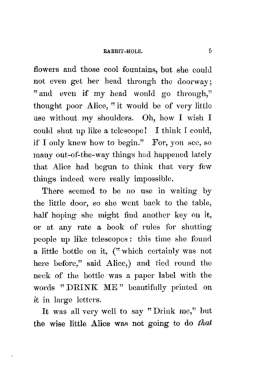

In [ ]:
plt.imshow(pixels, cmap='gray')
plt.axis("off")

Putting all the above steps in a function named otsu

In [ ]:
def otsu(pixels):
    values, counts = count_vals(pixels)
    px = counts/sum(counts)
    cdf = np.cumsum(px)
    pairs = []
    for t in range(1, 256):
        w1 = cdf[t]
        w2 = 1 - cdf[t]
        if w1!=0 and w2!=0:
            ipx = np.array([i*px[i] for i in range(0, 256)])
            mu1 = sum(ipx[:t+1])/w1
            mu2 = sum(ipx[t+1:])/w2
            sigma1 = sum([((i - mu1)**2)*px[i] for i in range(0, t+1)])/w1
            sigma2 = sum([((i - mu2)**2)*px[i] for i in range(t+1, 256)])/w2
            varience = w1*sigma1 + w2*sigma2
            pairs.append(varience)
    threshold = pairs.index(min(pairs))+1
    print(threshold)
    m = pixels.shape
    new_pixels = np.array([[0]*m[1]]*m[0])
    for i in range(m[0]):
        for j in range(m[1]):
            if pixels[i, j] < threshold:
                new_pixels[i, j] = 0
            else:
                new_pixels[i, j] = 255
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))
    ax1.imshow(pixels, cmap='gray')
    ax1.axis("off")
    ax1.set_title('Original image')
    ax2.imshow(new_pixels, cmap='gray')
    ax2.axis("off")
    ax2.set_title('After Otsu\'s binarization')

## Image 1: Bookpage 1

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


149


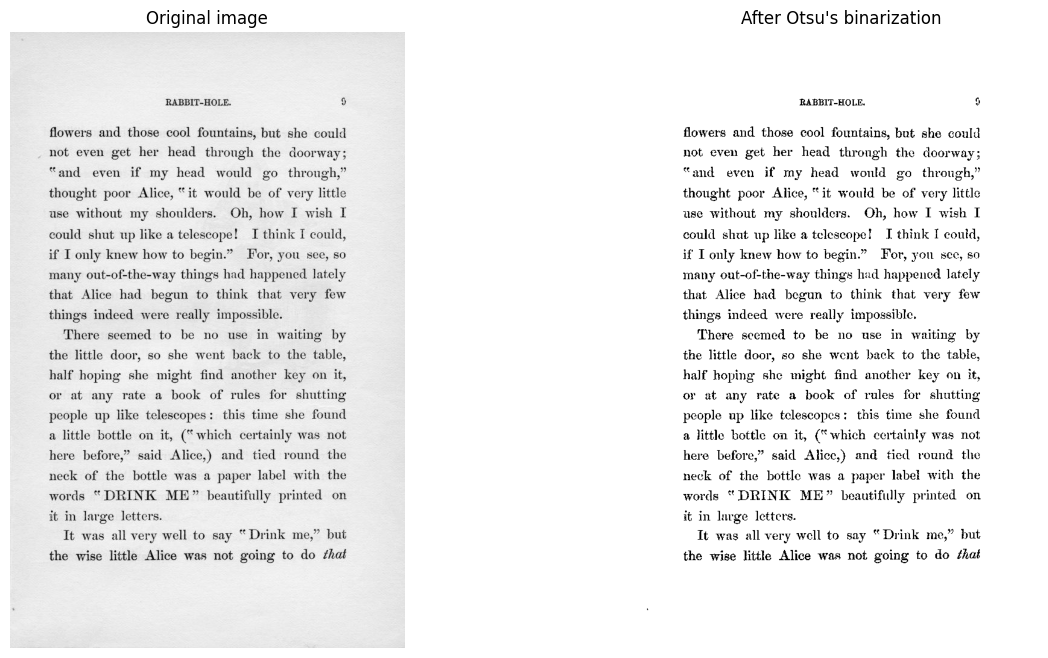

In [ ]:
img =Image.open('/content/bookpage_1.jpeg')
img = ImageOps.grayscale(img)
pixels = np.array(img)
otsu(pixels)

## Image 2: Bookpage 2

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


149


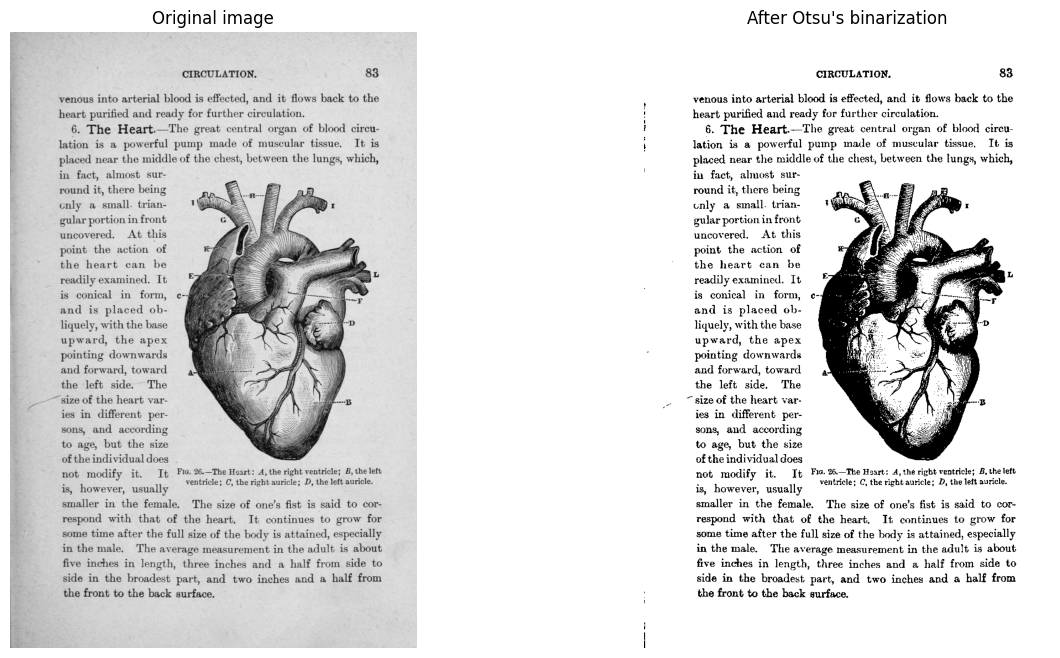

In [ ]:
img =Image.open('/content/bookpage_2.jpeg')
img = ImageOps.grayscale(img)
pixels = np.array(img)
otsu(pixels)

## Image 3: Panther

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


177


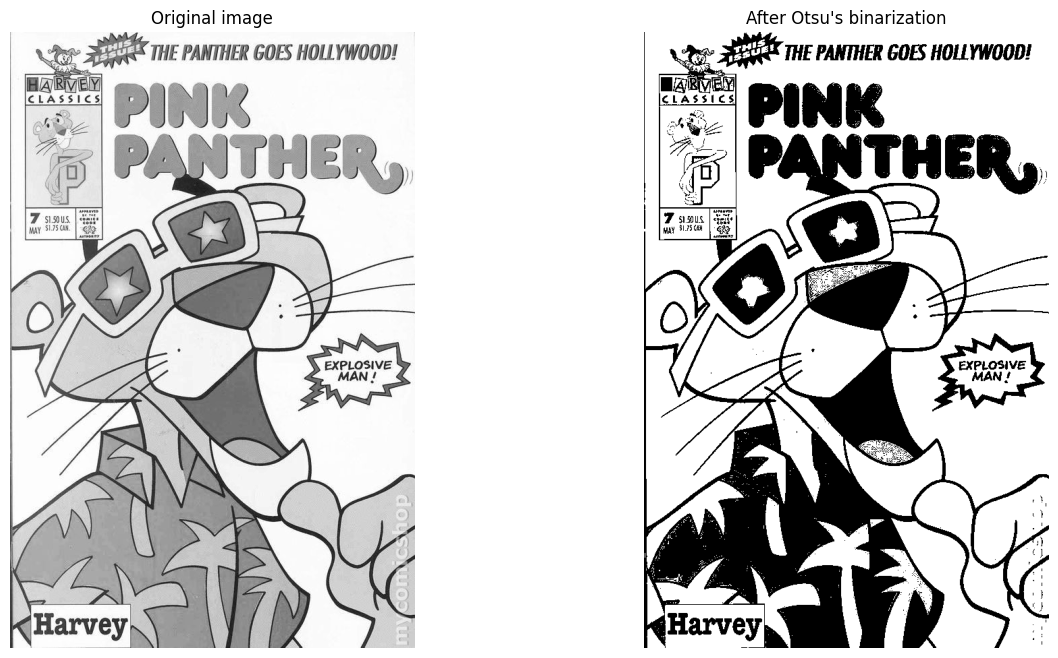

In [ ]:
img =Image.open('/content/panther.jpeg')
img = ImageOps.grayscale(img)
pixels = np.array(img)
otsu(pixels)

## Image 4: Tom

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


125


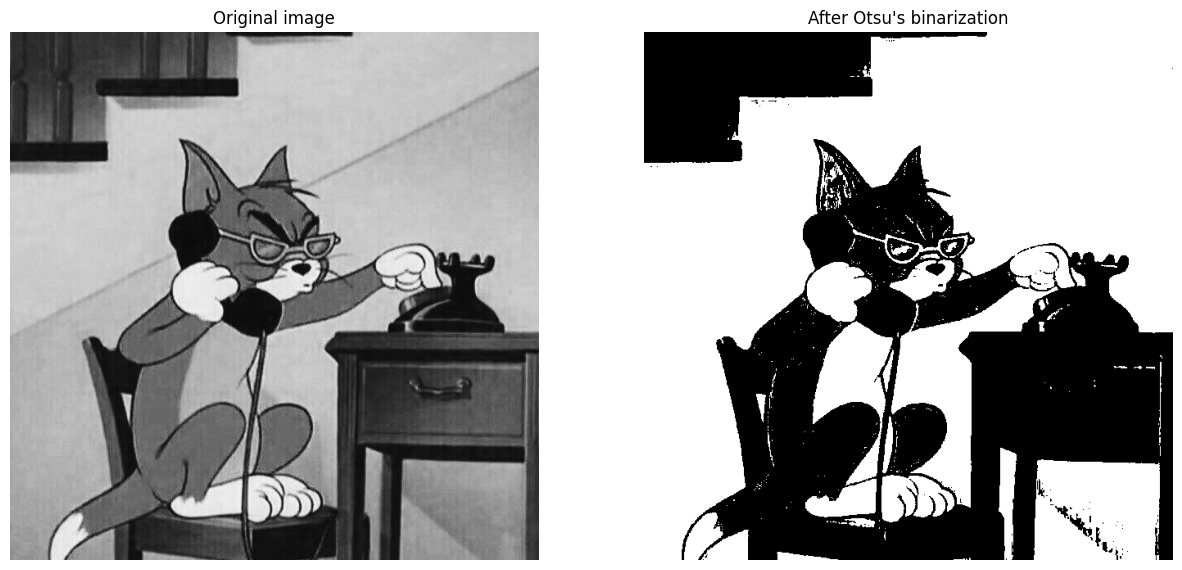

In [ ]:
img =Image.open('/content/tom.jpeg')
img = ImageOps.grayscale(img)
pixels = np.array(img)
otsu(pixels)

# Adding Guassian Noise

Adding the guassian noise to the image. here mean and standard deviation can be given as desired. Noise is generated by the random.normal function of numpy, by giving the parameters. and then finally adding the noise to the image.



In [ ]:
def gaussian(pixels, mean=0, sd=5):
    noise = np.random.normal(mean, sd, pixels.shape).astype(np.uint8)
    noisy_image = cv.add(pixels, noise)
    return noisy_image

### Image 1

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


158
114
174


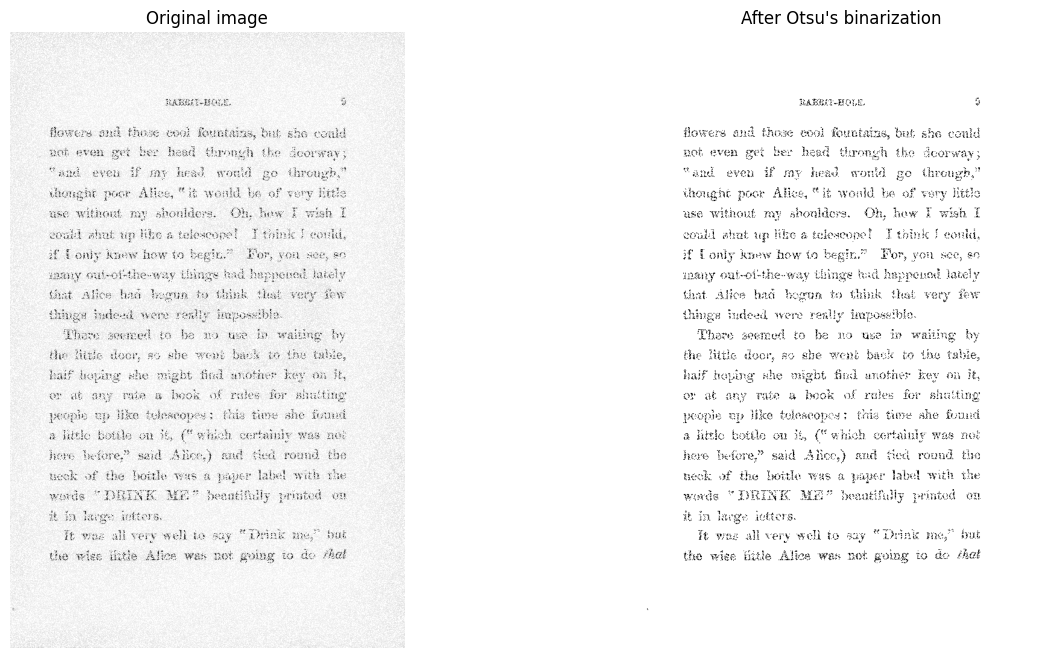

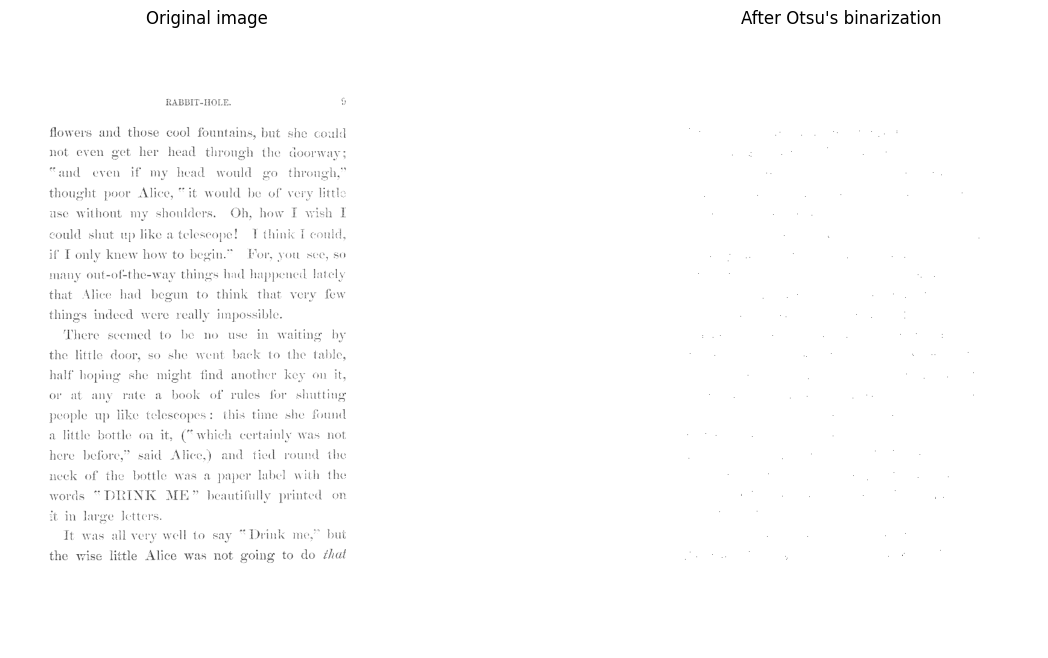

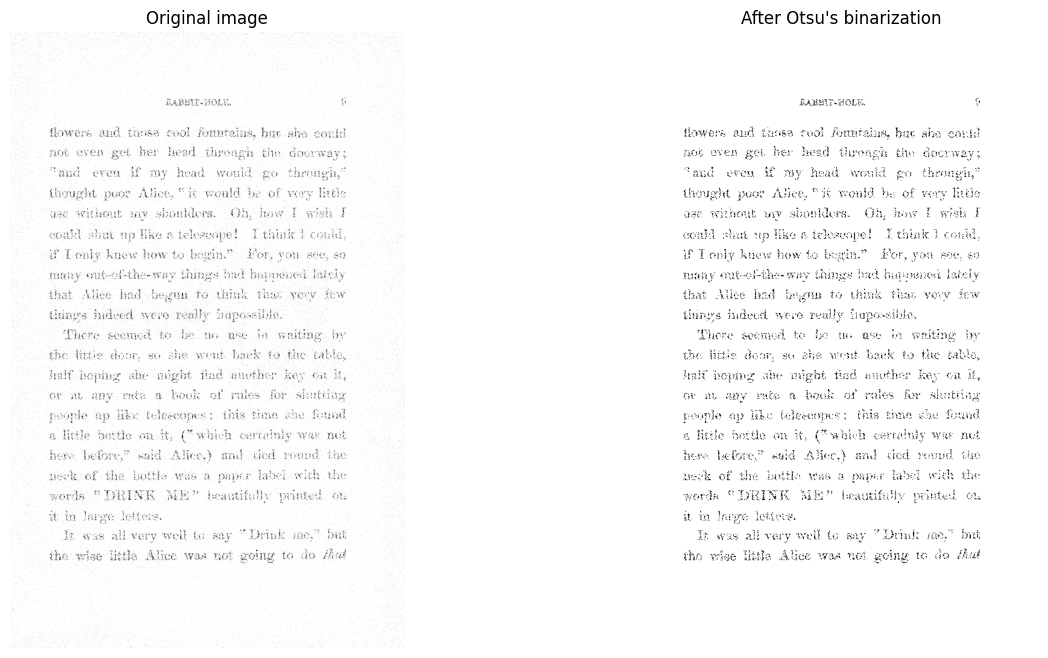

In [ ]:
img =Image.open('/content/bookpage_1.jpeg')
img = ImageOps.grayscale(img)
pixels = gaussian(np.array(img), 0, 5)
otsu(pixels)
pixels = gaussian(np.array(img), 127, 10)
otsu(pixels)
pixels = gaussian(np.array(img), 0, 50)
otsu(pixels)

## Image 2

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


166


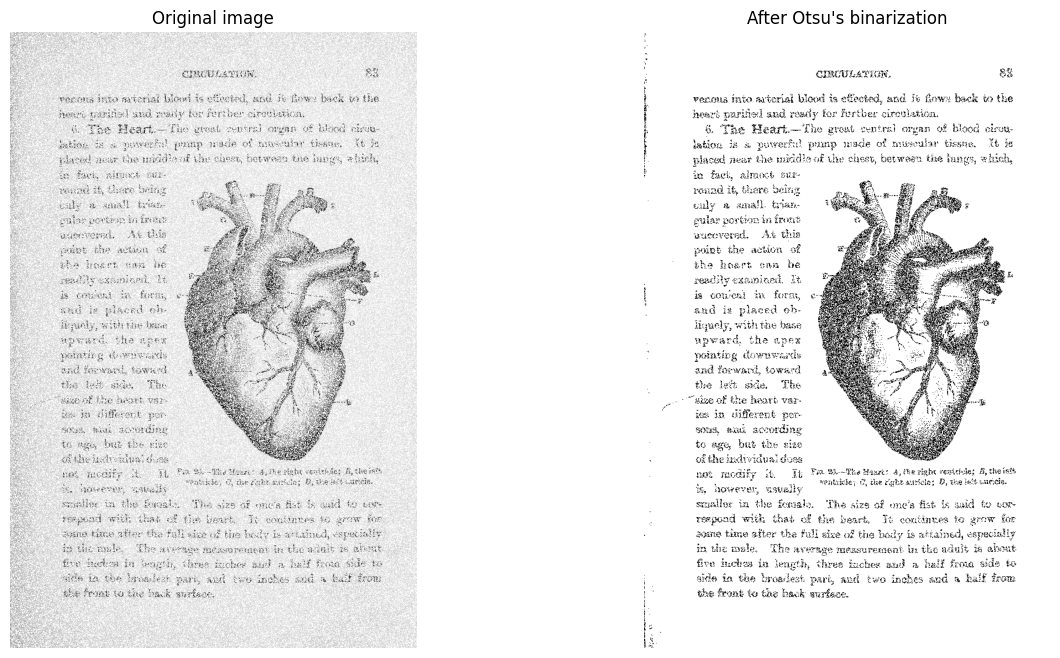

In [ ]:
img =Image.open('/content/bookpage_2.jpeg')
img = ImageOps.grayscale(img)
pixels = gaussian(np.array(img))
otsu(pixels)

## Image 3 Panther

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


184
177
186


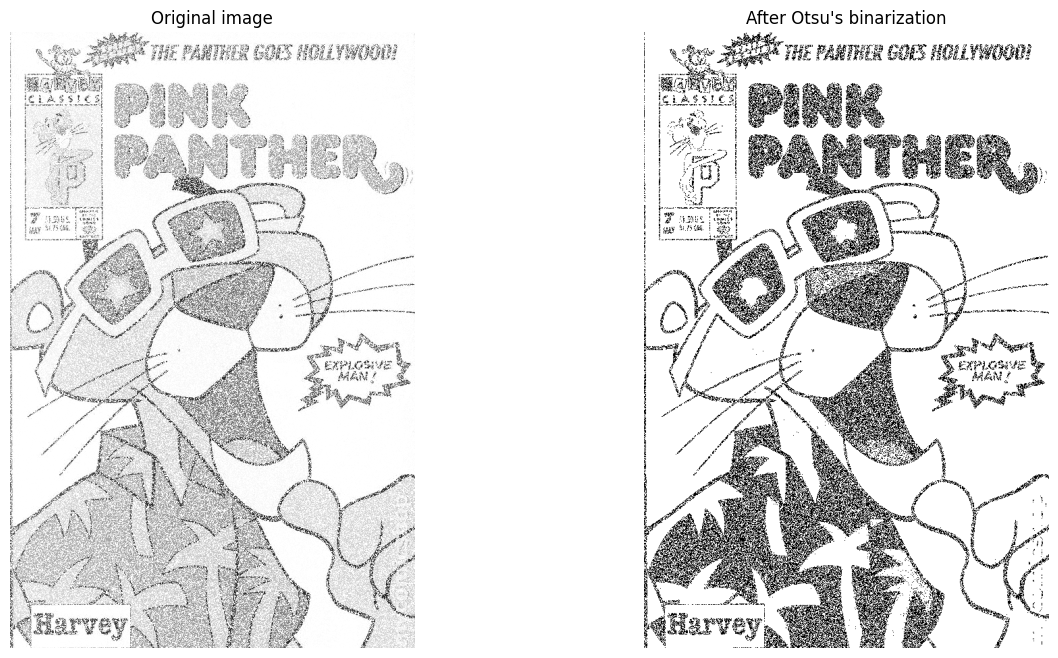

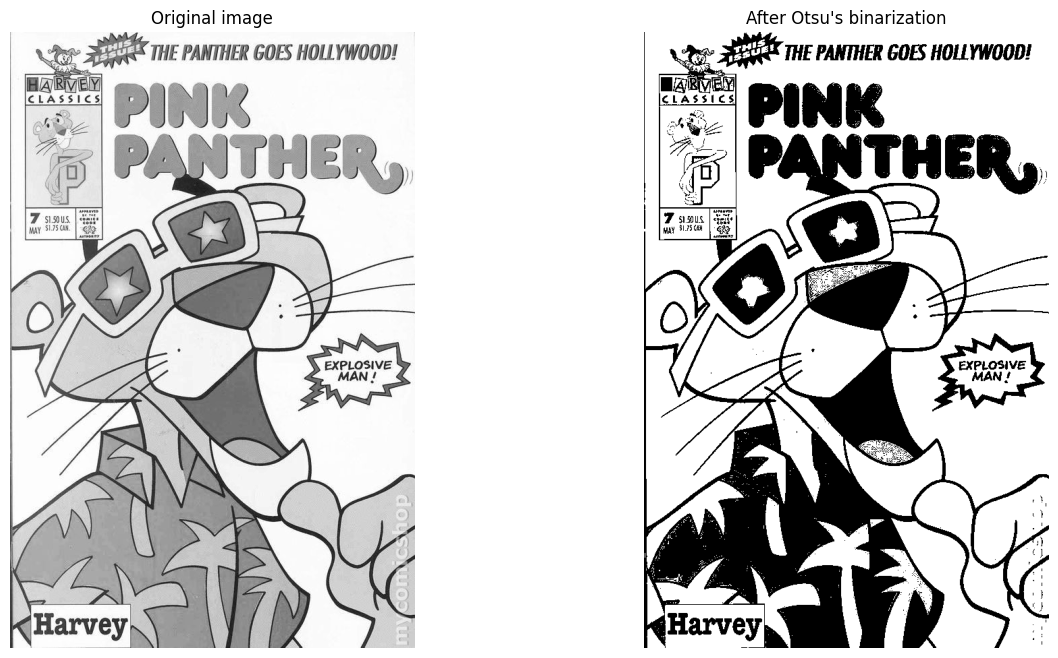

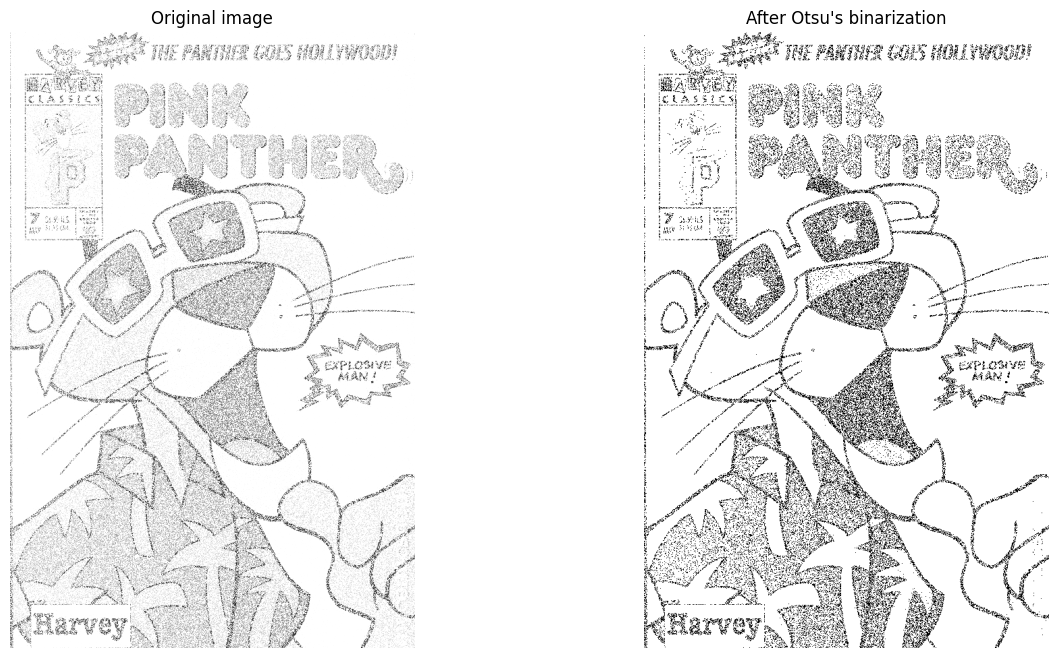

In [ ]:
img =Image.open('/content/panther.jpeg')
img = ImageOps.grayscale(img)
pixels = gaussian(np.array(img), 0, 5)
otsu(pixels)
pixels = gaussian(np.array(img), 0, 0.1)
otsu(pixels)
pixels = gaussian(np.array(img), 0, 50)
otsu(pixels)

## Image 4 Tom

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


150


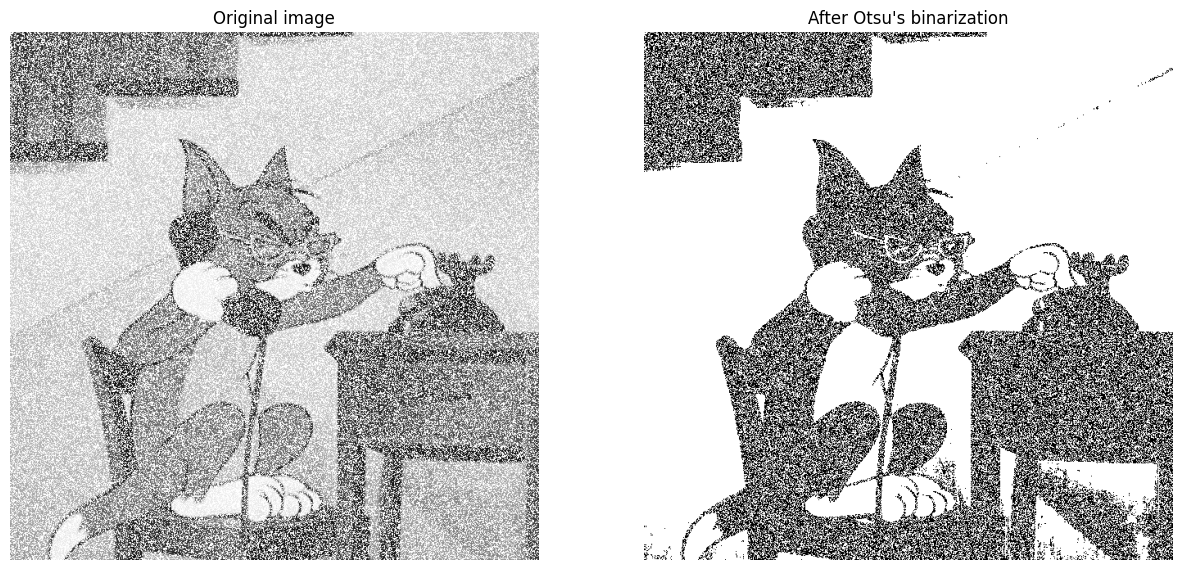

In [ ]:
img =Image.open('/content/tom.jpeg')
img = ImageOps.grayscale(img)
pixels = gaussian(np.array(img))
otsu(pixels)